In [1]:
!pip install qiskit qiskit_aer
!pip install numpy matplotlib scipy pylatexenc



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=7281452e933b33a850df5cdcc6547660a3e8f0fb16ba798f976ba0da2171bf46
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import pi
import math

Estimated Coupling Parameter (γ): 5.0


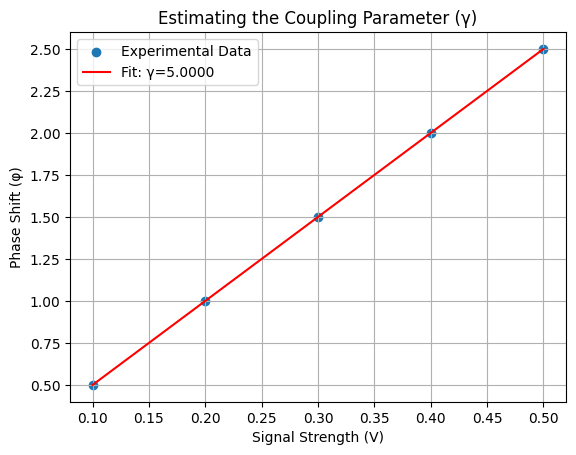

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# RamseY Circuit
def ramsey_circuit(phase_shift):
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.rz(phase_shift, 0)
    qc.h(0)
    qc.measure(0, 0)
    return qc

# A linear model for phase shift vs signal strength(Sensor Sensitivity)
def phase_model(signal, gamma):
    return gamma * signal

# Mock Data representing a linearly spaced data representing the Strength of external Flux and The resulting Phase shift
signal_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
phase_shifts = np.array([0.5, 1, 1.5, 2, 2.5])

# Fit the mock data to acquire an approiate gamma
gamma_guess = 1.0
params, _ = curve_fit(phase_model, signal_values, phase_shifts, p0=[gamma_guess])

# Store the coupling Coefficent
gamma_estimated = params[0]
print(f"Estimated Coupling Parameter (γ): {gamma_estimated}")

# Visualize the data and fit
plt.scatter(signal_values, phase_shifts, label='Experimental Data')
plt.plot(signal_values, phase_model(signal_values, gamma_estimated), label=f'Fit: γ={gamma_estimated:.4f}', color='red')
plt.xlabel('Signal Strength (V)')
plt.ylabel('Phase Shift (φ)')
plt.title('Estimating the Coupling Parameter (γ)')
plt.legend()
plt.grid(True)
plt.show()

# A simulated test case using Qiskit
test_signal = 3.5
test_phase = gamma_estimated * test_signal

# Create and run the quantum circuit
backend = Aer.get_backend('qasm_simulator')
circuit = ramsey_circuit(test_phase)
circuit.draw('mpl')
plt.show()

In [3]:
# transpile the circuit to the Aer simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)


# plot a histogram shots is the number of times the circuit is run(will be elaborated on later)
shots = 1000
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts()
print(f"Simulation Results for Signal {test_signal}V (Expected Phase {test_phase:.4f}): {counts}")


Simulation Results for Signal 3.5V (Expected Phase 17.5000): {'0': 604, '1': 396}
